## Building a Simple Data Pipeline: 
### Step 1 - Generating Mock Data

To start building a data pipeline, the first step is to create mock data. This data will simulate real-world data and help test and develop my pipeline. Below, I will generate random mock data with the following fields:

- `patient_id`: A unique identifier for each patient.
- `age`: The age of the patient.
- `occupation`: The occupation of the patient.
- `acl_surgery`: Whether the patient has undergone ACL surgery (Yes/No).

Before I do it, why Install Pandas first?

Pandas is essential for data manipulation and analysis in Python, offering efficient tools like DataFrames to handle, process, and analyze structured data.


In [ ]:
%pip install pandas

In [ ]:
import random
import pandas as pd

# Function to generate random mock data
def generate_mock_data(num_records=100):
    occupations = ['Engineer', 'Doctor', 'Teacher', 'Artist', 'Lawyer', 'Nurse']
    data = []
    
    for i in range(1, num_records + 1):
        patient_id = f"P{i:04d}"
        age = random.randint(18, 80)
        occupation = random.choice(occupations)
        acl_surgery = random.choice(['Yes', 'No'])
        data.append({
            'patient_id': patient_id,
            'age': age,
            'occupation': occupation,
            'acl_surgery': acl_surgery
        })
    
    return pd.DataFrame(data)

# Generate mock data
mock_data = generate_mock_data(100)

# Display the first few rows of the mock data
print(mock_data.head())

This code creates a DataFrame with 100 rows of random mock data. I can even adjust the `num_records` parameter to generate more or fewer records.

### Step 2: Setting Up Apache Beam

Now I have this mock data, I can then proceed to the next steps of building my data pipeline, such as data transformation and loading into a database or data warehouse. First, I need to install Apache Beam and its dependencies.

In [ ]:
%pip install apache-beam[gcp]
%pip install google-cloud-bigquery

I will need to authentice to Google Cloud using the command below. This will open a browser window where I can log in with your Google account.

In [6]:
!gcloud auth application-default login

'gcloud' is not recognized as an internal or external command,
operable program or batch file.


### Step 3: Building the Data Pipeline

In this step, I will use Apache Beam to build a data pipeline that processes the mock data generated earlier. The pipeline will include the following stages:

1. **Data Ingestion**: Read the mock data into the pipeline.
2. **Data Cleaning**: Filter out invalid or unwanted data (e.g., ensuring age is within a valid range).
3. **Data Transformation**: Transform the data as needed (e.g., converting fields to the required format).
4. **Data Loading**: Write the processed data to a destination, such as Google BigQuery.

The mock data I generated earlier will serve as the input for this pipeline. I will use Apache Beam's `Pipeline` API to define and execute the pipeline. The cleaned and transformed data will be written to a BigQuery table for further analysis.

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

# Define a function to clean and transform the data
def clean_data(element):
    # Example: Ensure age is within a valid range
    if 18 <= element['age'] <= 80:
        return element

# Define the pipeline options
pipeline_options = PipelineOptions()

# Create the pipeline
with beam.Pipeline(options=pipeline_options) as p:
    (
        p
        | 'Create Mock Data' >> beam.Create(mock_data.to_dict(orient='records'))
        | 'Clean Data' >> beam.Filter(clean_data)
        | 'Write to BigQuery' >> beam.io.WriteToBigQuery(
            'healthcare-bigquery:beam_patients.acl',
            schema='patient_id:STRING, age:INTEGER, occupation:STRING, acl_surgery:STRING',
            write_disposition=beam.io.BigQueryDisposition.WRITE_TRUNCATE,
            create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
            custom_gcs_temp_location='gs://my_first_healthcare_bucket/temp/'
        )
    )

The data has been successfully loaded into the BigQuery `acl` table. I can now query and analyze the data directly within BigQuery.

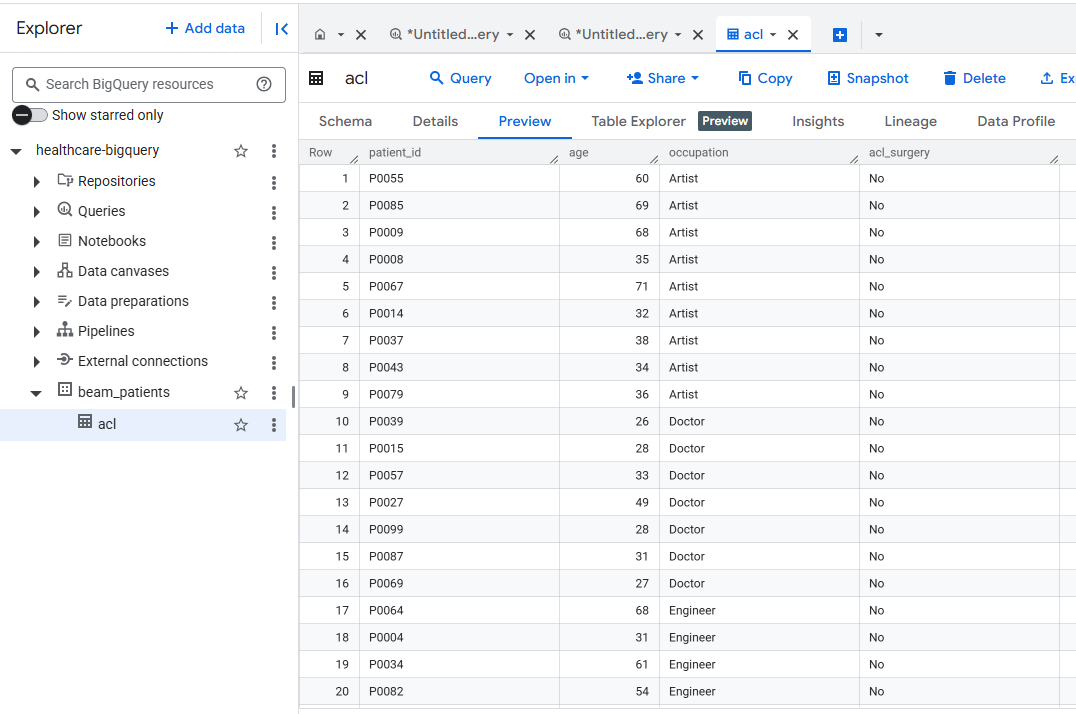

### Step 4: Analyzing the Data

Now that the data is loaded into BigQuery, it's time to explore and analyze it. One interesting question to investigate is:

**Which occupation experienced ACL surgery at the youngest average age compared to others?**

To answer this, I will calculate the average age of individuals who underwent ACL surgery, grouped by their occupation. This analysis will help identify trends or patterns in the data related to ACL surgeries across different occupations.

In [ ]:
SELECT
  occupation
  acl_surgery,
  AVG(age) AS avg_age
FROM
  `healthcare-bigquery.beam_patients.acl`
WHERE acl_surgery = 'Yes'
GROUP BY
  occupation, acl_surgery;

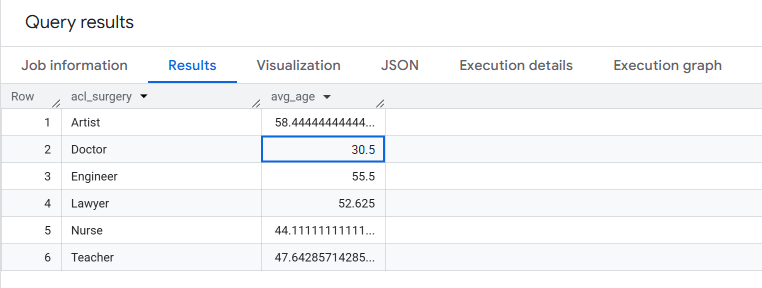

Insight: Doctors Experience ACL Surgery at the Youngest Average Age

From the analysis, it is observed that individuals in the occupation of "Doctor" experience ACL surgery at the youngest average age of 30.5 years compared to other occupations. This insight could indicate specific occupational risks or lifestyle factors associated with the medical profession that warrant further investigation??

### Final Note: Mock Data and Apache Beam Practice

This project represents my initial attempt at working with mock data and experimenting with Apache Beam. The goal was to gain a better understanding of how Apache Beam works and to practice building a basic data pipeline. This exercise has helped me explore the fundamental concepts of data processing and pipeline creation, setting the foundation for more advanced projects in the future.